# Practical Session 2
## Biomedical Signals and Images
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

Evgenia Papavasileiou, Jakub Ceranka, Hamza Mekhzoum and Jef Vandemeulebroucke
<br>
Questions email or Teams: jakub.ceranka@vub.be, hamza.mekhzoum@vub.be

<font color=blue>Students names and IDs: Siyan Luo(0594750) & Faiza Tasnia (0563547)</font> <Br>
<font color=blue>Academic Year </font>: 2022-2023

### Purpose
The purpose of this exercise session is to obtain insight in the signal processing, filtering and detection operations commonly applied in medical signal analysis. For more information on these concepts see the course slides and the related material.

The jupyter notebook should be submitted as the report of each practical session by teams of <b>two</b> students. In [colab](https://colab.research.google.com/notebooks/welcome.ipynb) you should download the notebook in the format *.ipynb and save it as a pdf version through print->save as pdf. Both the jupyter notebook and the pdf should be uploaded on canvas in a zip file before the deadline. The deadline for the report submission is <b>December 5th 2022</b>, at 23.59. Any report sent after the deadline will not be graded. 

### File upload in google colab:
You can upload the files that are needed for this exercise in google drive and then access them with the following code:

from google.colab import drive <br>
drive.mount('/content/gdrive') <br>

In the following link you can find alternative ways and [examples](https://colab.research.google.com/notebooks/io.ipynb)

### 1. Signal Denoising
ECG signals are usually distorted by a combination of high and low frequency noise as well as artificats of the frequency of the power line. The low frequency noise may be removed by using a highpass filter and the noise of
high frequency may be removed by using a lowpass filter.
### 1.1 Power Line Interference
Alternating current in the United States and several other countries oscillates at a frequency of 60 Hz and in the EU around 50 Hz. Those oscillations often corrupt measurements and have to be subtracted. Filtering of power line interference is very meaningful in the measurement of biomedical events, particularly in the case of recording signals as weak as the ECG. This kind of disturbance can be modeled by a sinusoid with respective frequency and random phase. Generally, methods used to reduce this kind of disturbance can be divided into two groups: methods based in spectral domain and methods based in time domain. Typically, for reduction of the AC interference in a spectral domain, a fixed or adaptive notch filter is used, i.e. a band-stop filter with a narrow stopband, while in time domain a moving average filter is often used.

### Exercise 1: Removal of Power Line Interference

- In python, load the noisy ECG signal ECG_ex1.mat using function [scipy.io.loadmat](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html).
Use functions [numpy.ndarray.astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) to convert the values to float and function [numpy.ndarray.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) to collapse the array in one dimension.
- Plot the signal in time domain with a sampling frequency fs=200Hz.

- Calculate the fourier transform of the signal using the [fft](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) function and plot its magnitude.
<Br>

In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fft import fft, fftfreq
from google.colab import drive
drive.mount('/content/gdrive')

from google.colab import files
files.upload()

# Every time reopen this website and run the cells
# Remember to firstly run this one, and choose the three .mat files to upload 

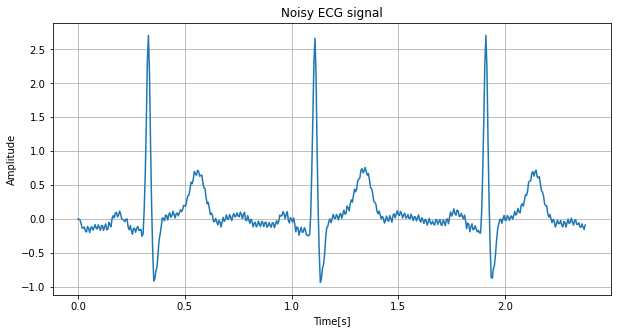

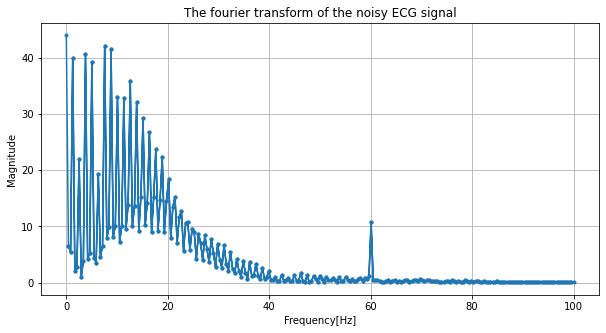

In [1]:
# Your code here:
import scipy.io as sio
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
# scipy.io.loadmat(file_name, mdict=None, appendmat=True, **kwargs)[source]
# Load MATLAB file
file1 = 'ECG_ex1.mat'
ex1_dict = sio.loadmat(file1)
# print(ex1_dict)
ex1 = ex1_dict.get('ecg') #<class 'numpy.ndarray'>
# print(ex1_dict)
# print(type(ex1_dict))
# ndarray.astype(dtype, order='K', casting='unsafe', subok=True, copy=True)
# Copy of the array, cast to a specified type.
ex1_float = ex1.astype(np.float32)
# ndarray.flatten(order='C')
# Return a copy of the array collapsed into one dimension.
ex1_1D = ex1_float.flatten()
# print(ex1_1D)
fs = 200

def create_time(frequency_rate, signal_size):
    time = np.linspace(0, signal_size/frequency_rate, signal_size, endpoint = False)
    return time

t = create_time(fs, len(ex1_1D))

def plot_amplitude(time, signal,title):
    plt.figure(figsize=(10,5))
    plt.plot(time,signal)
    plt.title(title)
    plt.xlabel("Time[s]")
    plt.ylabel("Amplitude")
    plt.grid(True, which='both')
    plt.show()

plot_amplitude(t, ex1_1D, "Noisy ECG signal")

def create_fourier_transform(frequency_rate,signal):
    fourier_transform_signal = np.fft.fft(signal)
    timestep = 1/frequency_rate
    frequencies = np.fft.fftfreq(len(signal),d=timestep)
    return frequencies,fourier_transform_signal

def plot_magnitude(frequencies, fft, title):
    plt.figure(figsize=(10,5))
    plt.plot(np.abs(frequencies), np.abs(fft),'.-')
    plt.title(title)
    plt.xlabel('Frequency[Hz]')
    plt.ylabel("Magnitude")
    plt.grid(True, which='both')
    plt.show()

freqs, fourier_transform = create_fourier_transform(fs,ex1_1D)
plot_magnitude(freqs, fourier_transform, "The fourier transform of the noisy ECG signal")


Where do you see the frequency of the power line?<br>
<font color=blue>Your answer here: Looking at the signal wave, we can find it quite rough, which indicates the noises. From the fourier transform plot, there's a peak at the frequency of 60Hz, while its nearby wave is steady, so we can see this is the frequency of the power line.</font>

- Design a notch filter that remove the frequency of the power line that you observed from the above spectrum. Use the following [scipy.signal.iirnotch](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html) function with a Quality factor=30. Plot the magnitude of the filter. 
- Filter the noisy ECG signal using the python function [filtfilt](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.filtfilt.html) and plot the filtered signal in the time domain.
- Calculate the Fourier transform of the ECG signal after filtering and plot its magnitude. <br>
 


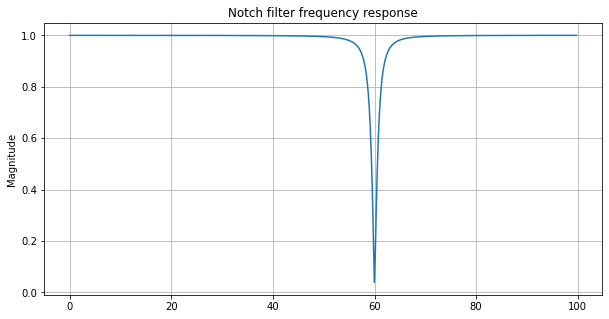

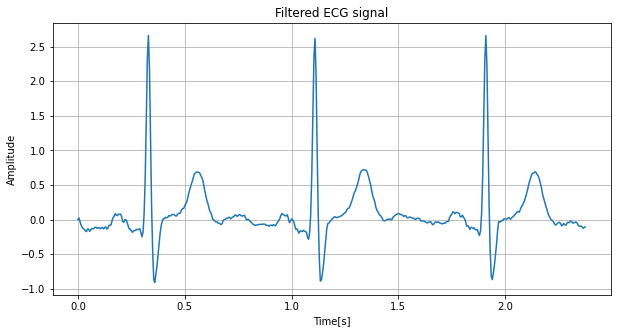

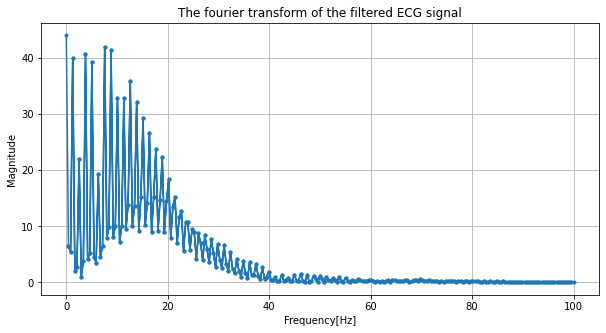

In [2]:
# Your code here:
# quality factor
Q = 30
# scipy.signal.iirnotch(w0, Q, fs=2.0)[source]
# Design second-order IIR notch digital filter.
power_line = 60
# w = power_line / (fs/2)
b,a = signal.iirnotch(power_line, Q, fs)
freq, h = signal.freqz(b, a, fs = fs)
# ff = (fs*0.5/np.pi)*freq
plt.figure(figsize=(10,5))
plt.plot(freq, abs(h))
plt.title("Notch filter frequency response")
# plt.xlabel("Frequency[Hz]")
plt.ylabel("Magnitude")
plt.grid(True, which='both')
# plt.xlim(0,100)
plt.show()

# scipy.signal.filtfilt(b, a, x, axis=-1, padtype='odd', padlen=None, method='pad', irlen=None)
# A forward-backward filter.
# This function applies a linear filter twice, once forward and once backwards. The combined filter has linear phase.
filt_ex1 = signal.filtfilt(b,a,ex1_1D)
plot_amplitude(t, filt_ex1, "Filtered ECG signal")
freqs, fourier_transform = create_fourier_transform(fs,filt_ex1)
plot_magnitude(freqs, fourier_transform, "The fourier transform of the filtered ECG signal")




What do you observe from the frequency spectrum of the filtered ECG signal?<br>
<font color=blue> Your answer here: From the notch filter frequency response, we can find a downside peak at the frequency of 60Hz, which is the frequency we want to remove. After applying the filter, the signal wave is much smoother, and now when we look at the fourier transform plot, we can notice the peak at 60Hz is removed, which shows that we have successfully filtered the power line frequency.</font>

### 1.2 Digital Filters
Digital filters are systems that function on discrete signals to reduce or enhance specific aspects of the signal. In this exercise we will focus on filters that are used to improve the Signal to Noise ratio (SNR) of a signal, i.e. we will use filters to remove the noise from an ECG signal. A filter is defined by its transfer function in the z-domain or by its difference equation. The general transfer function for a linear, time-invariant, digital filter is defined as in (1)

\begin{equation*}
H(z) =\frac{b[0]+b[1]z^{-1}+b[2]z^{-2}+...+b[K]z^{-K}}{1+a[1]z^{-1}+a[2]z^{-2}+...+a[L]z^{-L}} = 
\frac{ \sum_{k=0}^K b[k]z^{-k}} { \sum_{l=0}^L a[l]z^{-l}} \quad\quad\quad\quad\quad\quad\quad\quad \text{(1)}
\end{equation*}

The corresponding difference equation is then

\begin{equation*}
y(n) = \sum_{k=0}^K b[k]x[n-k] - \sum_{l=0}^L a[l]y[n-l]      \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\text{(2)}
\end{equation*}

A special case of (1), (2) occurs if we set $a_{l}$ = 0 for l = 1, ..., L. Then we get the system in equation (3) which is known as the weighted moving average of the input signal.

\begin{equation*}
\quad\quad\ y(n) = \sum_{k=0}^K b[k]x[n-k]   \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\text{(3)}
\end{equation*}

The coefficients b[k] are known as the <b>weights</b>, or filter coefficients, or the weighting function or impulse response and K is known as the <b>length</b> of the filter.

### Exercise 2: ECG signal denoising using moving average fiter
- Load the ECG signal ECG_ex2.mat as in previous exercise. Use functions [numpy.ndarray.astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) to convert the values to float and function [numpy.ndarray.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) to collapse the array in one dimension. 
- Plot the signal in the time domain. Use sampling frequency fs = 1024Hz.
- Design a 3-points (K=3) and a 7-points (K=7) moving average filter. Each filter has equal weights that sum up to 1. Define your own generic python function which based on the number of points given (length of the filter K), calculates the filter kernel and applies it to your noisy signal based on looping through your signal to consider every window of size K.


      e.g def moving_average_filter(signal, K):

            .......
        
            return filtered_signal
        
- Plot three subgraphs the one under the other. The first plot should contain the original signal and the others the filtered signal after the application of each moving average filter (K=3 and K=7). Plot the filtered signals <b>on top</b> of the original signal. 



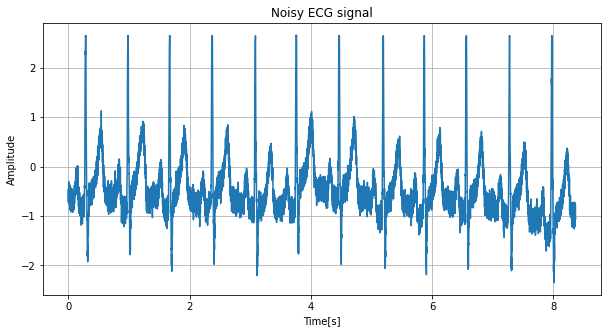

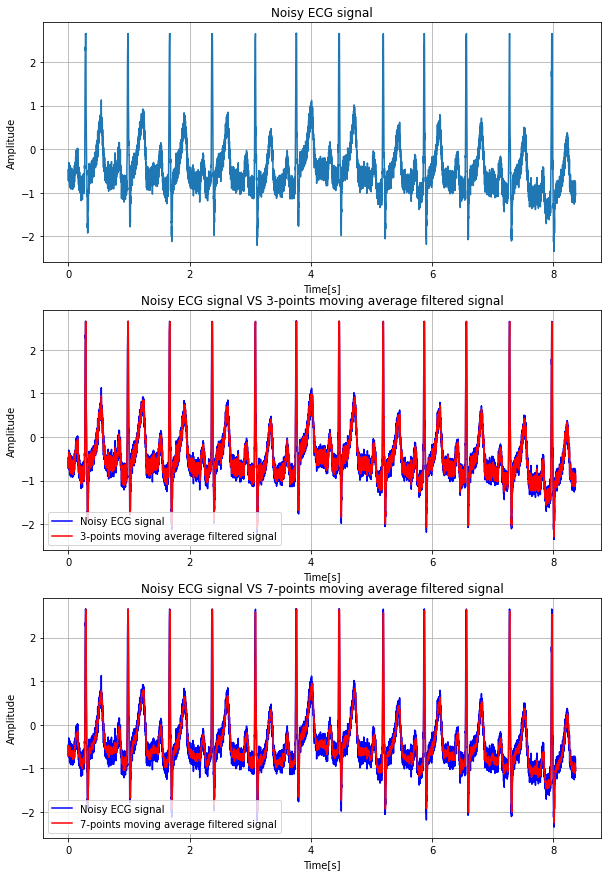

In [3]:
# Your code here:
file2 = "ECG_ex2.mat"
ex2_dict = sio.loadmat(file2)
# print(ex2_dict)
ex2 = ex2_dict.get('ecg_hfn') #<class 'numpy.ndarray'>
ex2_float = ex2.astype(np.float32)
ex2_1D = ex2_float.flatten()
fs = 1024
t = create_time(fs, len(ex2_1D))
plot_amplitude(t,ex2_1D,"Noisy ECG signal")

def moving_average_filter(K,signal):
    w = 1/K
    filtered_signal = []
    for i in range(K):
        # signal = np.append(0,signal)
        # fix error: index out of range
        signal = np.append(signal[0],signal)
    for n in range(K, len(signal)):
        ele = 0
        for i in range(K):
            ele += signal[n - i] * w
        filtered_signal.append(ele)
    return filtered_signal

filter3 = moving_average_filter(3,ex2_1D)
filter7 = moving_average_filter(7,ex2_1D)

fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(10,15))
ax1.plot(t,ex2_1D)
ax1.set_title("Noisy ECG signal")
ax1.grid(True, which='both')
ax1.set(xlabel="Time[s]",ylabel="Amplitude")

ax2.plot(t,ex2_1D,'b',t,filter3,'r')
ax2.set_title("Noisy ECG signal VS 3-points moving average filtered signal")
ax2.legend(("Noisy ECG signal","3-points moving average filtered signal"),loc='best')
ax2.grid(True, which='both')
ax2.set(xlabel="Time[s]",ylabel="Amplitude")
# plt.show()

ax3.plot(t,ex2_1D,'b',t,filter7,'r')
ax3.set_title("Noisy ECG signal VS 7-points moving average filtered signal")
ax3.legend(("Noisy ECG signal","7-points moving average filtered signal"),loc='best')
ax3.grid(True, which='both')
ax3.set(xlabel="Time[s]",ylabel="Amplitude")
plt.show()


Which filter removes the noise better and why? <br>
<font color=blue>Your answer here: 7-points moving average filter works better, as we can see from the plot, which is smoother. Because it takes more points (longer window length) to calculate the average value, which can eliminate the variation. </font>

### 3. Peak detection
### Exercise 3: Peak Detection from ECG signals
In this exercise you will create an algorithm for the detection of the QRS wave of an ECG signal by implementing the following steps:<br>

<b>Part One: Apply a series of filters</b><br>
- Step 1: Load the ECG signal ECG_ex3.mat as in the previous exercises and plot it in the time domain using sampling frequency fs = 200Hz.
- Step 2: Normalize the ECG signal by dividing with the maximum absolute value. Plot the normalized signal.
- Step 3: Filter the signal you obtain from the previous step with a bandpass filter by cascading a low pass digital filter with cutoff frequency of 12 Hz and a high pass digital filter with cutoff frequency of 5Hz. Use function [scipy.signal.butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) to create the filters whose order be 3 and function [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) to filter the signal. Plot the filtered signals after each step.
- Step 4: Filter the signal of the previous step with a derivative filter that has the transfer function h = [-1, -2, 0, 2, 1]/8. From this you can get the b and a coefficients, i.e. b[0]=-1/8, b[1]=-2/8 etc. Again use [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) to filter the signal. Plot the filtered signal
- Step 5: Perform Squaring on the ECG signal you obtain after the derivative filter. Plot the filtered signal.
- Step 6: Filter the squared signal with a 30 point moving average filter. Plot the filtered signal. <br>

<b>Part Two: Use a built in python function on the original signal</b> <br>
- Use [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function on the normalized ECG signal from <b>Step 2</b>, for finding the QRS complexes. Use distance 150 for the R and S peaks and prominence between 0.05 and 0.3 for the Q peaks. Plot the QRS complexes on top of the original signal. Keep a critical eye on the result. In this [link](https://www.google.com/search?q=qrs+complex&rlz=1C1PRFI_enBE772BE772&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiZ5_i24p_tAhXJzqQKHSW2BIMQ_AUoAXoECBEQAw&biw=1920&bih=937#imgrc=e1DK720GR0Ca-M) you can find an image that shows the Q,R,S peaks of an ECG signal. It is a good idea to use different symbols for depicting the Q,R,S peaks on top of the ECG signal.

- Calculate the heart beat using the following formula. 
\begin{equation*}
Heart Rate = 60/RRinterval in seconds.
\end{equation*}



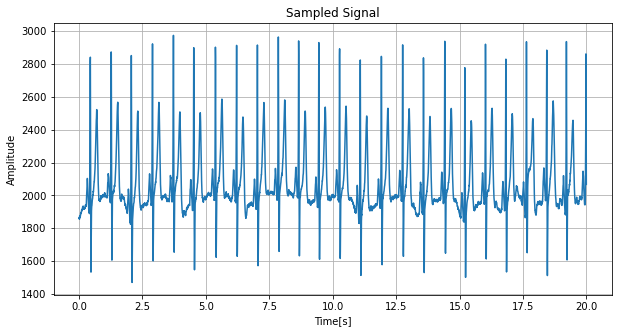

In [4]:
#step 1

sampling_freq = 200 #Hz
mat_file="ECG_ex3.mat"
ECG3_mat = sio.loadmat(mat_file)

ECG3 = np.array(ECG3_mat['ECG'])
ECG3 =ECG3.astype(float).flatten()
sample_data3 = len(ECG3)
# t=sample_data3/sampling_freq
# time=np.linspace(start=0,stop=t,num=sample_data3,endpoint=False)
t = create_time(sampling_freq, sample_data3)
plot_amplitude(t, ECG3, "Sampled Signal")

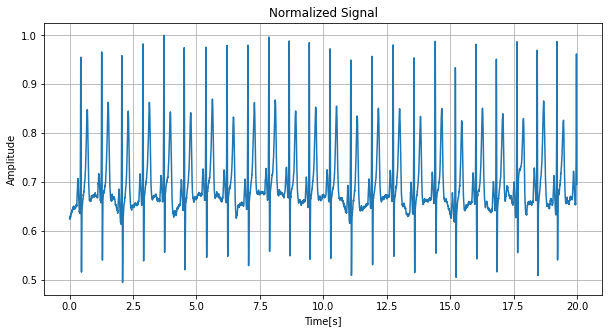

In [5]:
#step2:  Normalize the ECG signal 

#finding the maximum absolute value in signal amplitude
max_absolute_value=max(abs(ECG3))  
norm_ECG3=ECG3/max_absolute_value    #normalizing signal 
plot_amplitude(t, norm_ECG3, "Normalized Signal")


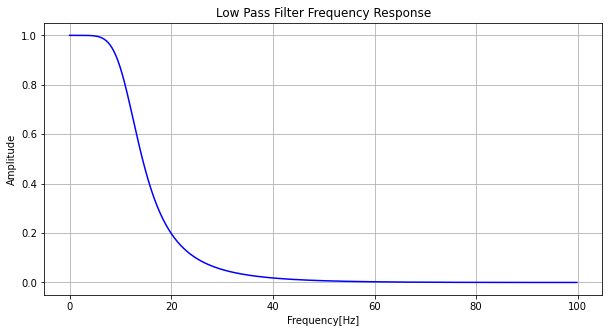

In [6]:
# step3: create low pass  filter with cutoff frequency of 12 Hz & order 3
N = 3 # The order of the filter
low_cutoff = 12
b,a=signal.butter(N, low_cutoff, btype='low', fs=sampling_freq, output='ba')
w,h=signal.freqz(b,a)

plt.figure(figsize=(10,5))
plt.plot((sampling_freq*0.5/np.pi)*w, abs(h),'b')
plt.title("Low Pass Filter Frequency Response")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Amplitude")
plt.grid(True, which='both')
plt.show()


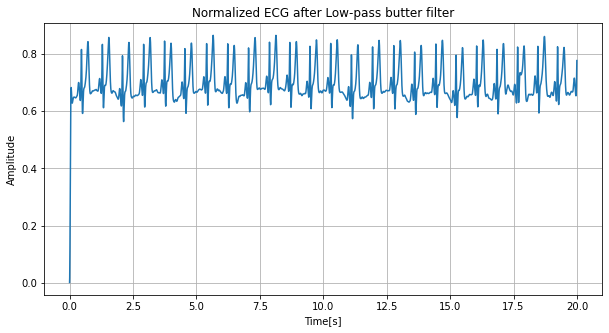

In [7]:
#Applying the low pass butter filter on original signal
low_filter_ECG3=signal.lfilter(b,a,norm_ECG3)
plot_amplitude(t, low_filter_ECG3, "Normalized ECG after Low-pass butter filter")

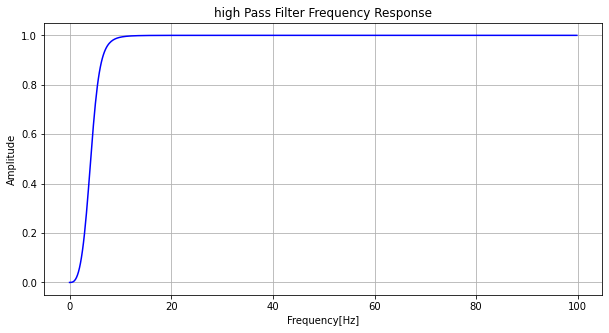

In [8]:
# create high pass filter with cutoff frequency of 5 Hz and order 3
high_cutoff = 5
b_high_butter_filter,a_high_butter_filter=signal.butter(N, high_cutoff, btype='high', fs=sampling_freq, output='ba')
w2,h2=signal.freqz(b_high_butter_filter,a_high_butter_filter)
plt.figure(figsize=(10,5))
plt.plot((sampling_freq*0.5/np.pi)*w2, abs(h2),'b')
plt.title("high Pass Filter Frequency Response")
plt.xlabel("Frequency[Hz]")
plt.ylabel("Amplitude")
plt.grid(True, which='both')
plt.show()

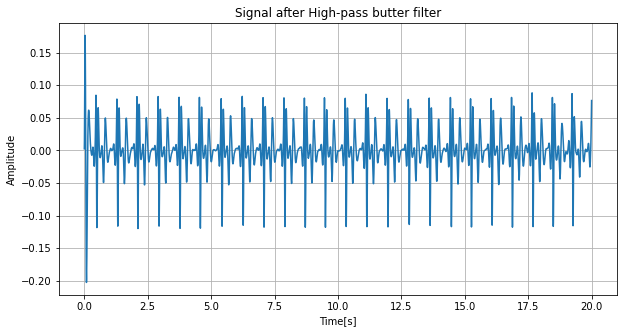

In [9]:
high_filter_ECG3=signal.lfilter(b_high_butter_filter,a_high_butter_filter,low_filter_ECG3)
plot_amplitude(t, high_filter_ECG3,"Signal after High-pass butter filter")


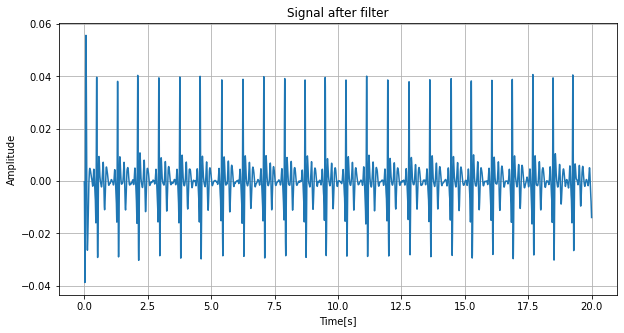

In [10]:
#step4

b_coef =[-1, -2, 0, 2, 1]
a_coef = 8
filter_signal= signal.lfilter(b_coef, a_coef, high_filter_ECG3)
plot_amplitude(t, filter_signal, "Signal after filter")


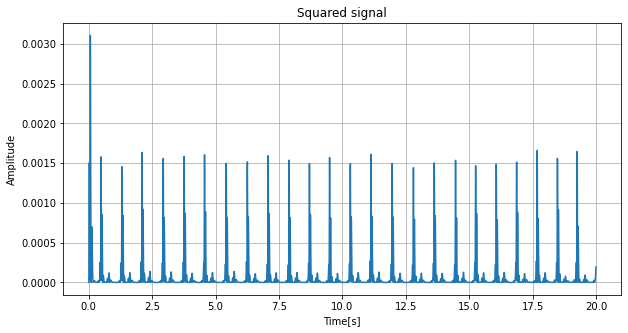

In [11]:
#step 5: squaring the signal
squared_signal=filter_signal**2 #squaring the signal
plot_amplitude(t, squared_signal, "Squared signal")

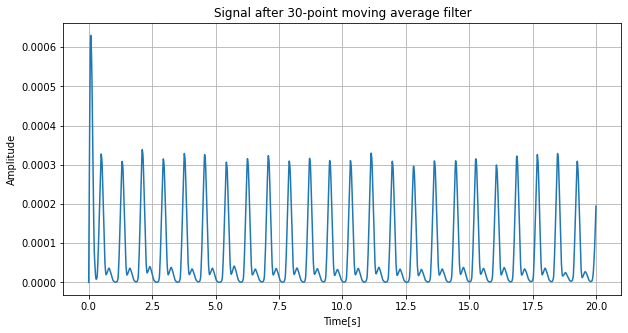

In [12]:
#step 6: filter squared signal
L=30 #30 point moving average filter
b = (np.ones(L))/L
a = np.ones(1)
filter_signal30 = signal.filtfilt(b,a, squared_signal) #Applying 30-point moving avera
plot_amplitude(t,filter_signal30, "Signal after 30-point moving average filter")

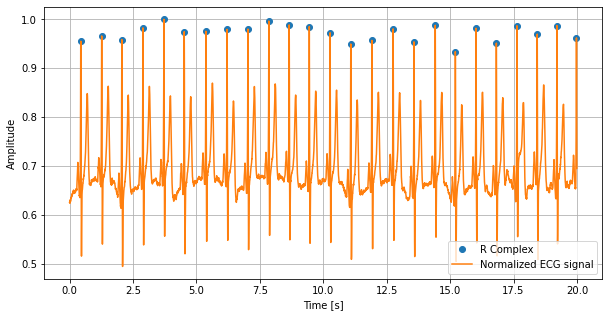

In [13]:
# part two: find peaks
#R complex
time = t
peaks,properties=signal.find_peaks(norm_ECG3,height=0.9,distance=150)
plt.figure(figsize=(10,5))
plt.plot(time[peaks],norm_ECG3[peaks],"o",label="R Complex")
plt.plot(time,norm_ECG3,label="Normalized ECG signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

In [14]:
#finding Q complexes
Q_peaks,Q_properties=signal.find_peaks(-norm_ECG3,prominence=(0.05,0.3))
#set a threshold as 30
Q_peaks_new = [];
QR_dist = 30
for i in range(0,len(Q_peaks)):
 for j in range(0,len(peaks)):
      if np.abs(peaks[j] - Q_peaks[i]) < QR_dist:
        Q_peaks_new.append(Q_peaks[i])
Q_peaks=Q_peaks_new

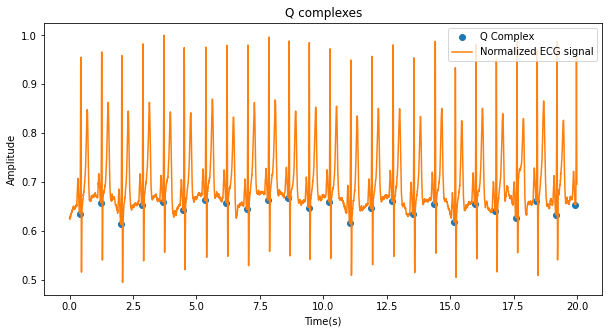

In [15]:
plt.figure(figsize=(10,5))
plt.plot(time[Q_peaks],norm_ECG3[Q_peaks],"o",label="Q Complex")
plt.plot(time,norm_ECG3,label="Normalized ECG signal")
plt.title("Q complexes")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

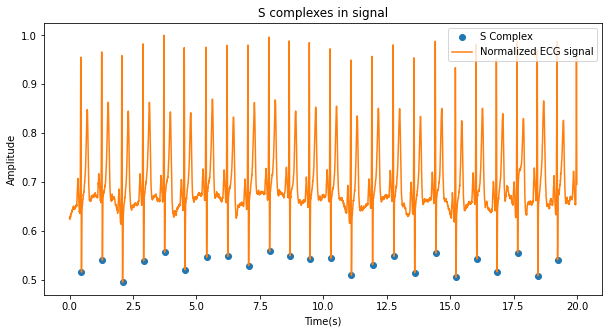

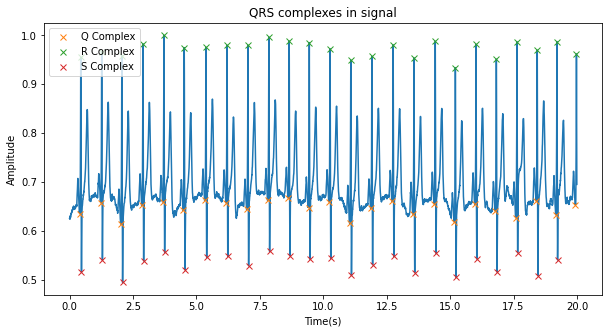

In [16]:
#finding S complexes
#S peaks obtained by finding local minima in a signal
S_peaks ,S_properties =signal.find_peaks(-norm_ECG3,height=-0.6,distance=150)
plt.figure(figsize=(10,5))
plt.plot(time[S_peaks],norm_ECG3[S_peaks],"o",label="S Complex")
plt.plot(time,norm_ECG3,label="Normalized ECG signal")
plt.title("S complexes in signal")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(time,norm_ECG3)
plt.plot(time[Q_peaks],norm_ECG3[Q_peaks],"x",label="Q Complex")
plt.plot(time[peaks],norm_ECG3[peaks],"x",label="R Complex")
plt.plot(time[S_peaks],norm_ECG3[S_peaks],"x",label="S Complex")
plt.title("QRS complexes in signal")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [17]:
# heart beat calculation
RR_diff=np.diff(time[peaks]) #rr difference in time
mean_RR=np.mean(RR_diff) #average time
heart_rate=60/mean_RR
print(heart_rate)
print("The heart rate is: ",heart_rate)

73.71384694138726
The heart rate is:  73.71384694138726


What is the Heart Rate?<br>
<font color=blue>Your answer here:The heart rate is 73.71 beats per minute </font>